**Proyecto Equipo D**

![An image](https://media.timtul.com/media/users/hackaboss_300_20211202185733.png)

**Proyecto II Grupo D** del curso de Ciencia de Datos de Hack'a'Boss **01 Julio 2024** (DSB10RT).

Seleccionar uno de estos enfoques para el proyecto y definir el problema

Para este segundo proyecto vamos a poder elegir entre:

**Machine Learning**
*   Aprendizaje supervisado.
*   Aprendizaje no supervisado.

**NLP**
*   Análisis de Texto.
*   Modelos predictivos.
*   Análisis de Sentimiento.

**Algoritmos Genéticos**

**Recomendadores.**


# 01. Definición del problema

Partimos por la definición del problema o el objetivo del proyecto.

¿Qué variable queremos predecir?

¿Es una regresión o una clasificación?

¿Qué datos son necesarios para predecir esa variable?

¿Cómo consigo esos datos?

# 02. Recopilación de Datos

Una de las etapas más difíciles de todo proyecto, para esta etapa podemos decidir usar herramientas del los módulos pasados, como API o Web Scraping.

Podemos usar las siguientes fuentes para encontrar los datos que necesitamos.

Fuentes:

*  UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php

*  Kaggle: https://www.kaggle.com/datasets

*  Google Dataset Search: https://datasetsearch.research.google.com/

*  Microsoft Open Data: https://msropendata.com/

*  European Data: https://data.europa.eu/en

*  Awesome Data: https://github.com/awesomedata/awesome-public-datasets

*  Amazon Web Services: https://registry.opendata.aws/

##################

####################

El data set seleccionado fue descargado del siguiente enlace:

https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/Behavioral-Risk-Factor-Surveillance-System-BRFSS-N/ikwk-8git/data

# 03. Exploratory Data Analysis (EDA) y Procesamiento de Datos

Para seguir con el proyecto es necesario conocer los datos, para esto vamos a utilizar las herramientas de EDA, es decir, visualizaciones y estadística.

También es necesario procesar los datos antes de implementarlos en el modelo, esto comprende:

*   NaN's.

*   Outliers.

*   Variables no numéricas.

*   Dimensionalidad.

*   Normalización de Datos.

Esta parte del proyecto se debe adaptar a los datos.



## Importar Librerias Requeridas

In [35]:
!pip install scikit-learn
!pip install category_encoders
!pip install unidecode
!pip install --upgrade seaborn

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from math import sqrt
from unidecode import unidecode

# Modelo
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Herramienta Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder

# Train Test Split
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Validaciones
from sklearn.model_selection import KFold, LeaveOneOut

# Importar herramientas de prepocesamiento necesarias
...

Ellipsis

## Exploración y limpieza Inicial del DataFrame

In [37]:
df = pd.read_csv("Data/heart_2020_cleaned.csv")

In [38]:
## Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

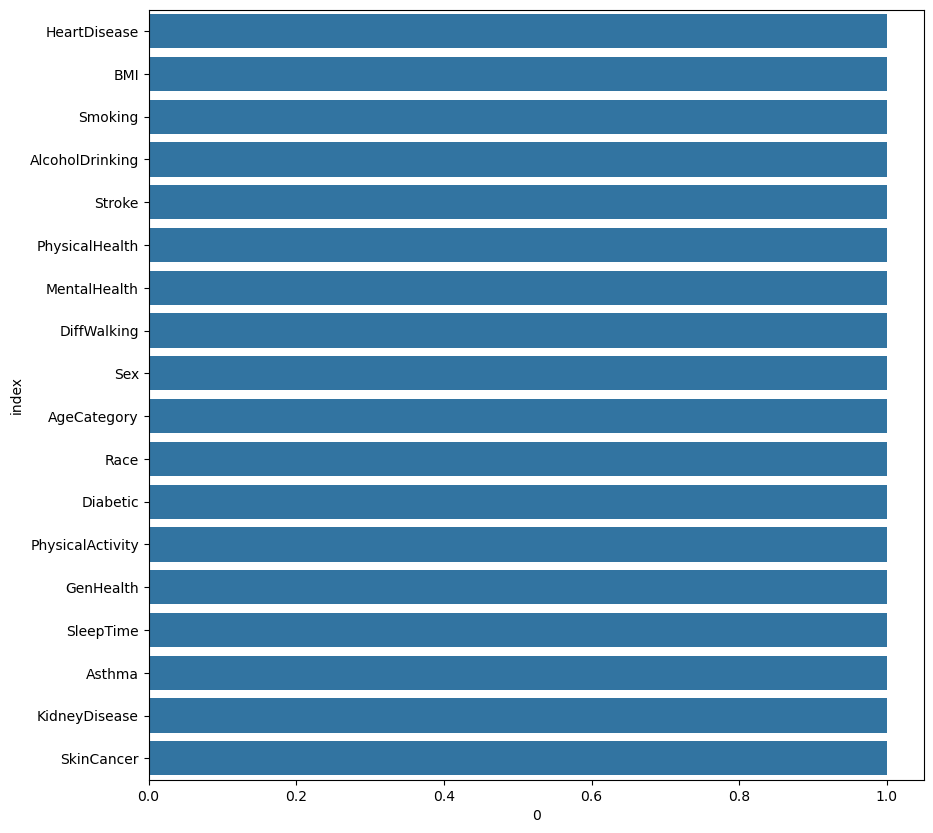

In [40]:
plt.figure(figsize=(10,10))
sns.barplot((pd.DataFrame(df.count())/df.shape[0]).reset_index(), x=0, y='index')
plt.show()

In [41]:
stats = df.describe()

stats

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [42]:
# Funcion para limpiar nombres de columnas de espacios y caracteres especiales

def limpiar_nomb_colums(nombre_columna):
    nombre_columna = nombre_columna.strip()
    nombre_columna = nombre_columna.replace(' ', '_')
    nombre_columna = unidecode(nombre_columna)
    return nombre_columna


In [43]:
# Funcion para limpiar los espacios en blanco al inicio y al final

def limpiar_espacios_blancos(df):
  for columna in df.columns:
    df[columna] = df[columna].str.strip()

In [44]:
# Funcion para cambiar valores None por NaN

def llenar_Nan(df):
  for columna in df.columns:
    df[columna] = df[columna].fillna(np.NaN)

In [45]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [46]:
## llenar_Nan(df)
## df.columns = df.columns.map(limpiar_nomb_colums)
## limpiar_espacios_blancos(df)

In [47]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Columna: HeartDisease

In [48]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
df['HeartDisease'].nunique()

2

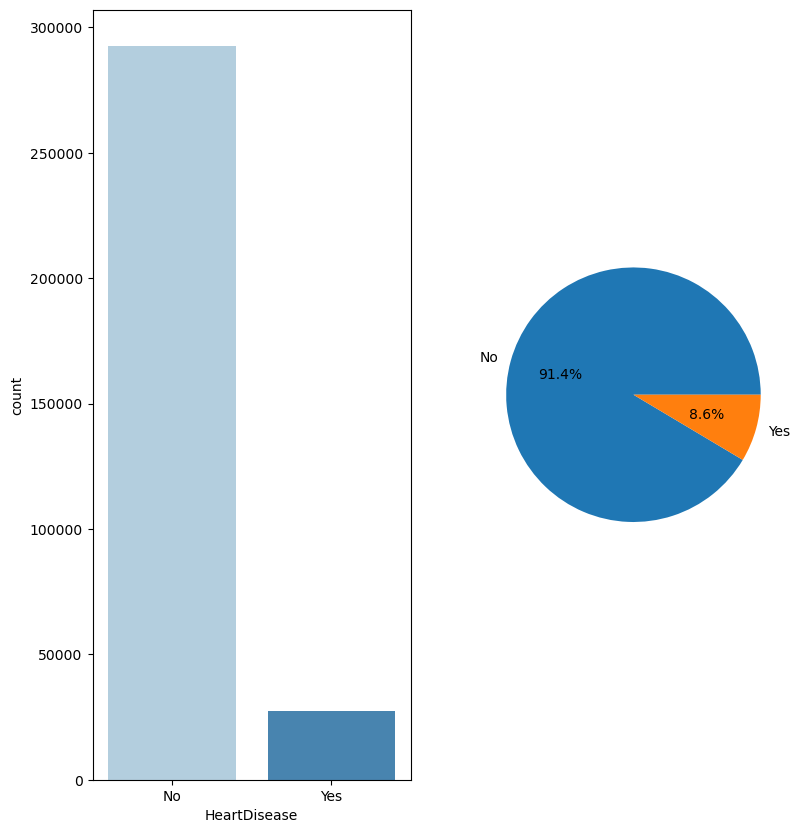

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))

sns.countplot(x='HeartDisease', palette='Blues', hue='HeartDisease', data=df, ax=axes[0])
plt.pie(df['HeartDisease'].value_counts(), autopct='%1.1f%%', labels=df['HeartDisease'].unique())
plt.subplots_adjust(left=0.2)
plt.show()

## Columna: BMI

In [51]:
# Jose

## Columna: Smoking

In [52]:
# Jose

## Columna: AlcoholDrinking

In [53]:
# Jose

## Columna: Stroke

In [54]:
# Jose

## Columna: PhysicalHealth

In [55]:
# Rosalia

## Columna: MentalHealth

In [56]:
# Rosalia

## Columna: DiffWalking

In [57]:
# Rosalia

## Columna: Sex

In [58]:
# Rosalia

## Columna: AgeCategory

In [59]:
# Alexia

df['AgeCategory'].unique()


array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [60]:
df['AgeCategory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 319795 entries, 0 to 319794
Series name: AgeCategory
Non-Null Count   Dtype 
--------------   ----- 
319795 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [61]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['AgeCategory']])
df_age_category = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['AgeCategory']))
df_age_category.sample(5)

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
106980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129039,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
229084,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_age_category = df_age_category.astype(int)
df_age_category.dtypes

AgeCategory_18-24          int64
AgeCategory_25-29          int64
AgeCategory_30-34          int64
AgeCategory_35-39          int64
AgeCategory_40-44          int64
AgeCategory_45-49          int64
AgeCategory_50-54          int64
AgeCategory_55-59          int64
AgeCategory_60-64          int64
AgeCategory_65-69          int64
AgeCategory_70-74          int64
AgeCategory_75-79          int64
AgeCategory_80 or older    int64
dtype: object

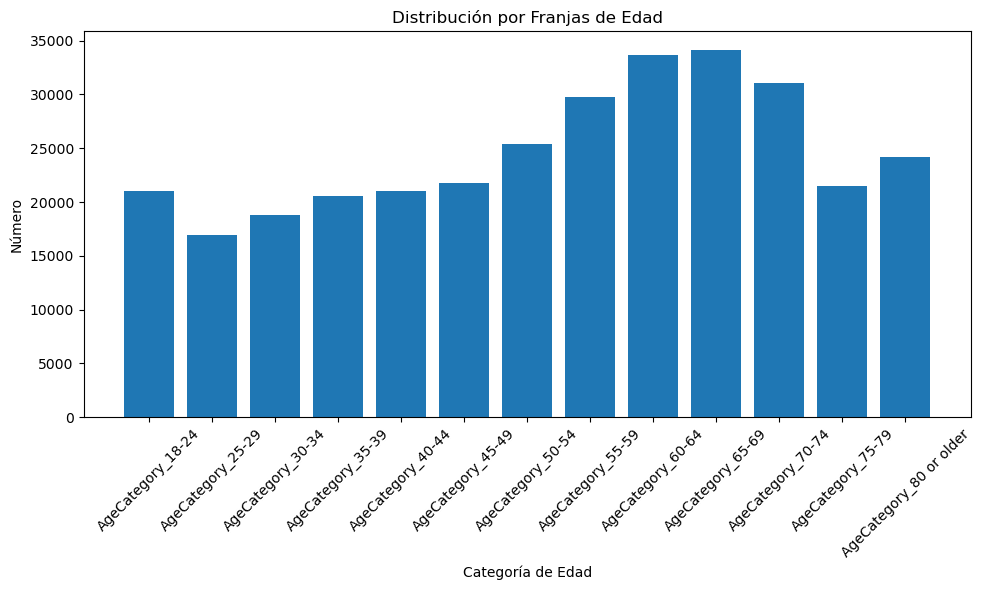

In [70]:
suma_edades = df_age_category.sum(axis=0)

plt.figure(figsize=(10, 6))
plt.bar(suma_edades.index, suma_edades.values)
plt.title('Distribución por Franjas de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Número')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [63]:
# Alexia

## Columna: Diabetic

In [64]:
# Alexia

## Columna: PhysicalActivity

In [65]:
# Alexia

## Columna: GenHealth

In [66]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [67]:
df['GenHealth'].nunique()

5

## Columna: SleepTime

## Columna: Asthma

## Columna: KidneyDisease

## Columna: SkinCancer

# Exploratory Data Analysis (EDA)

In [ ]:
print("Valores únicos para variables categóricas:")
for columna in df.select_dtypes(include = 'object').columns:
    print(f"Columna '{columna}':")
    print(df[columna].value_counts())

Valores únicos para variables categóricas:
Columna 'HeartDisease':
HeartDisease
No     160452
Yes     15082
Name: count, dtype: int64
Columna 'Smoking':
Smoking
No     102203
Yes     73330
Name: count, dtype: int64
Columna 'AlcoholDrinking':
AlcoholDrinking
No     163406
Yes     12127
Name: count, dtype: int64
Columna 'Stroke':
Stroke
No     168753
Yes      6780
Name: count, dtype: int64
Columna 'DiffWalking':
DiffWalking
No     151055
Yes     24478
Name: count, dtype: int64
Columna 'Sex':
Sex
Female    92577
Male      82956
Name: count, dtype: int64
Columna 'AgeCategory':
AgeCategory
65-69          18844
60-64          18424
70-74          17313
55-59          16177
80 or older    13816
50-54          13778
75-79          12164
45-49          11709
18-24          11451
35-39          11234
40-44          11209
30-34          10220
25-29           9194
Name: count, dtype: int64
Columna 'Race':
Race
White                             135878
Black                              15088
Hispan

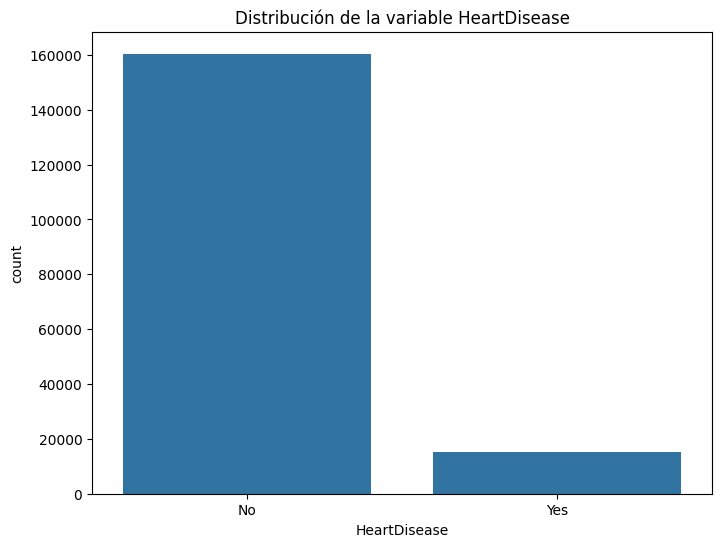

In [ ]:
# Distribución de la variable HeartDisease

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.countplot(x = 'HeartDisease', data = df)
plt.title('Distribución de la variable HeartDisease')
plt.show()

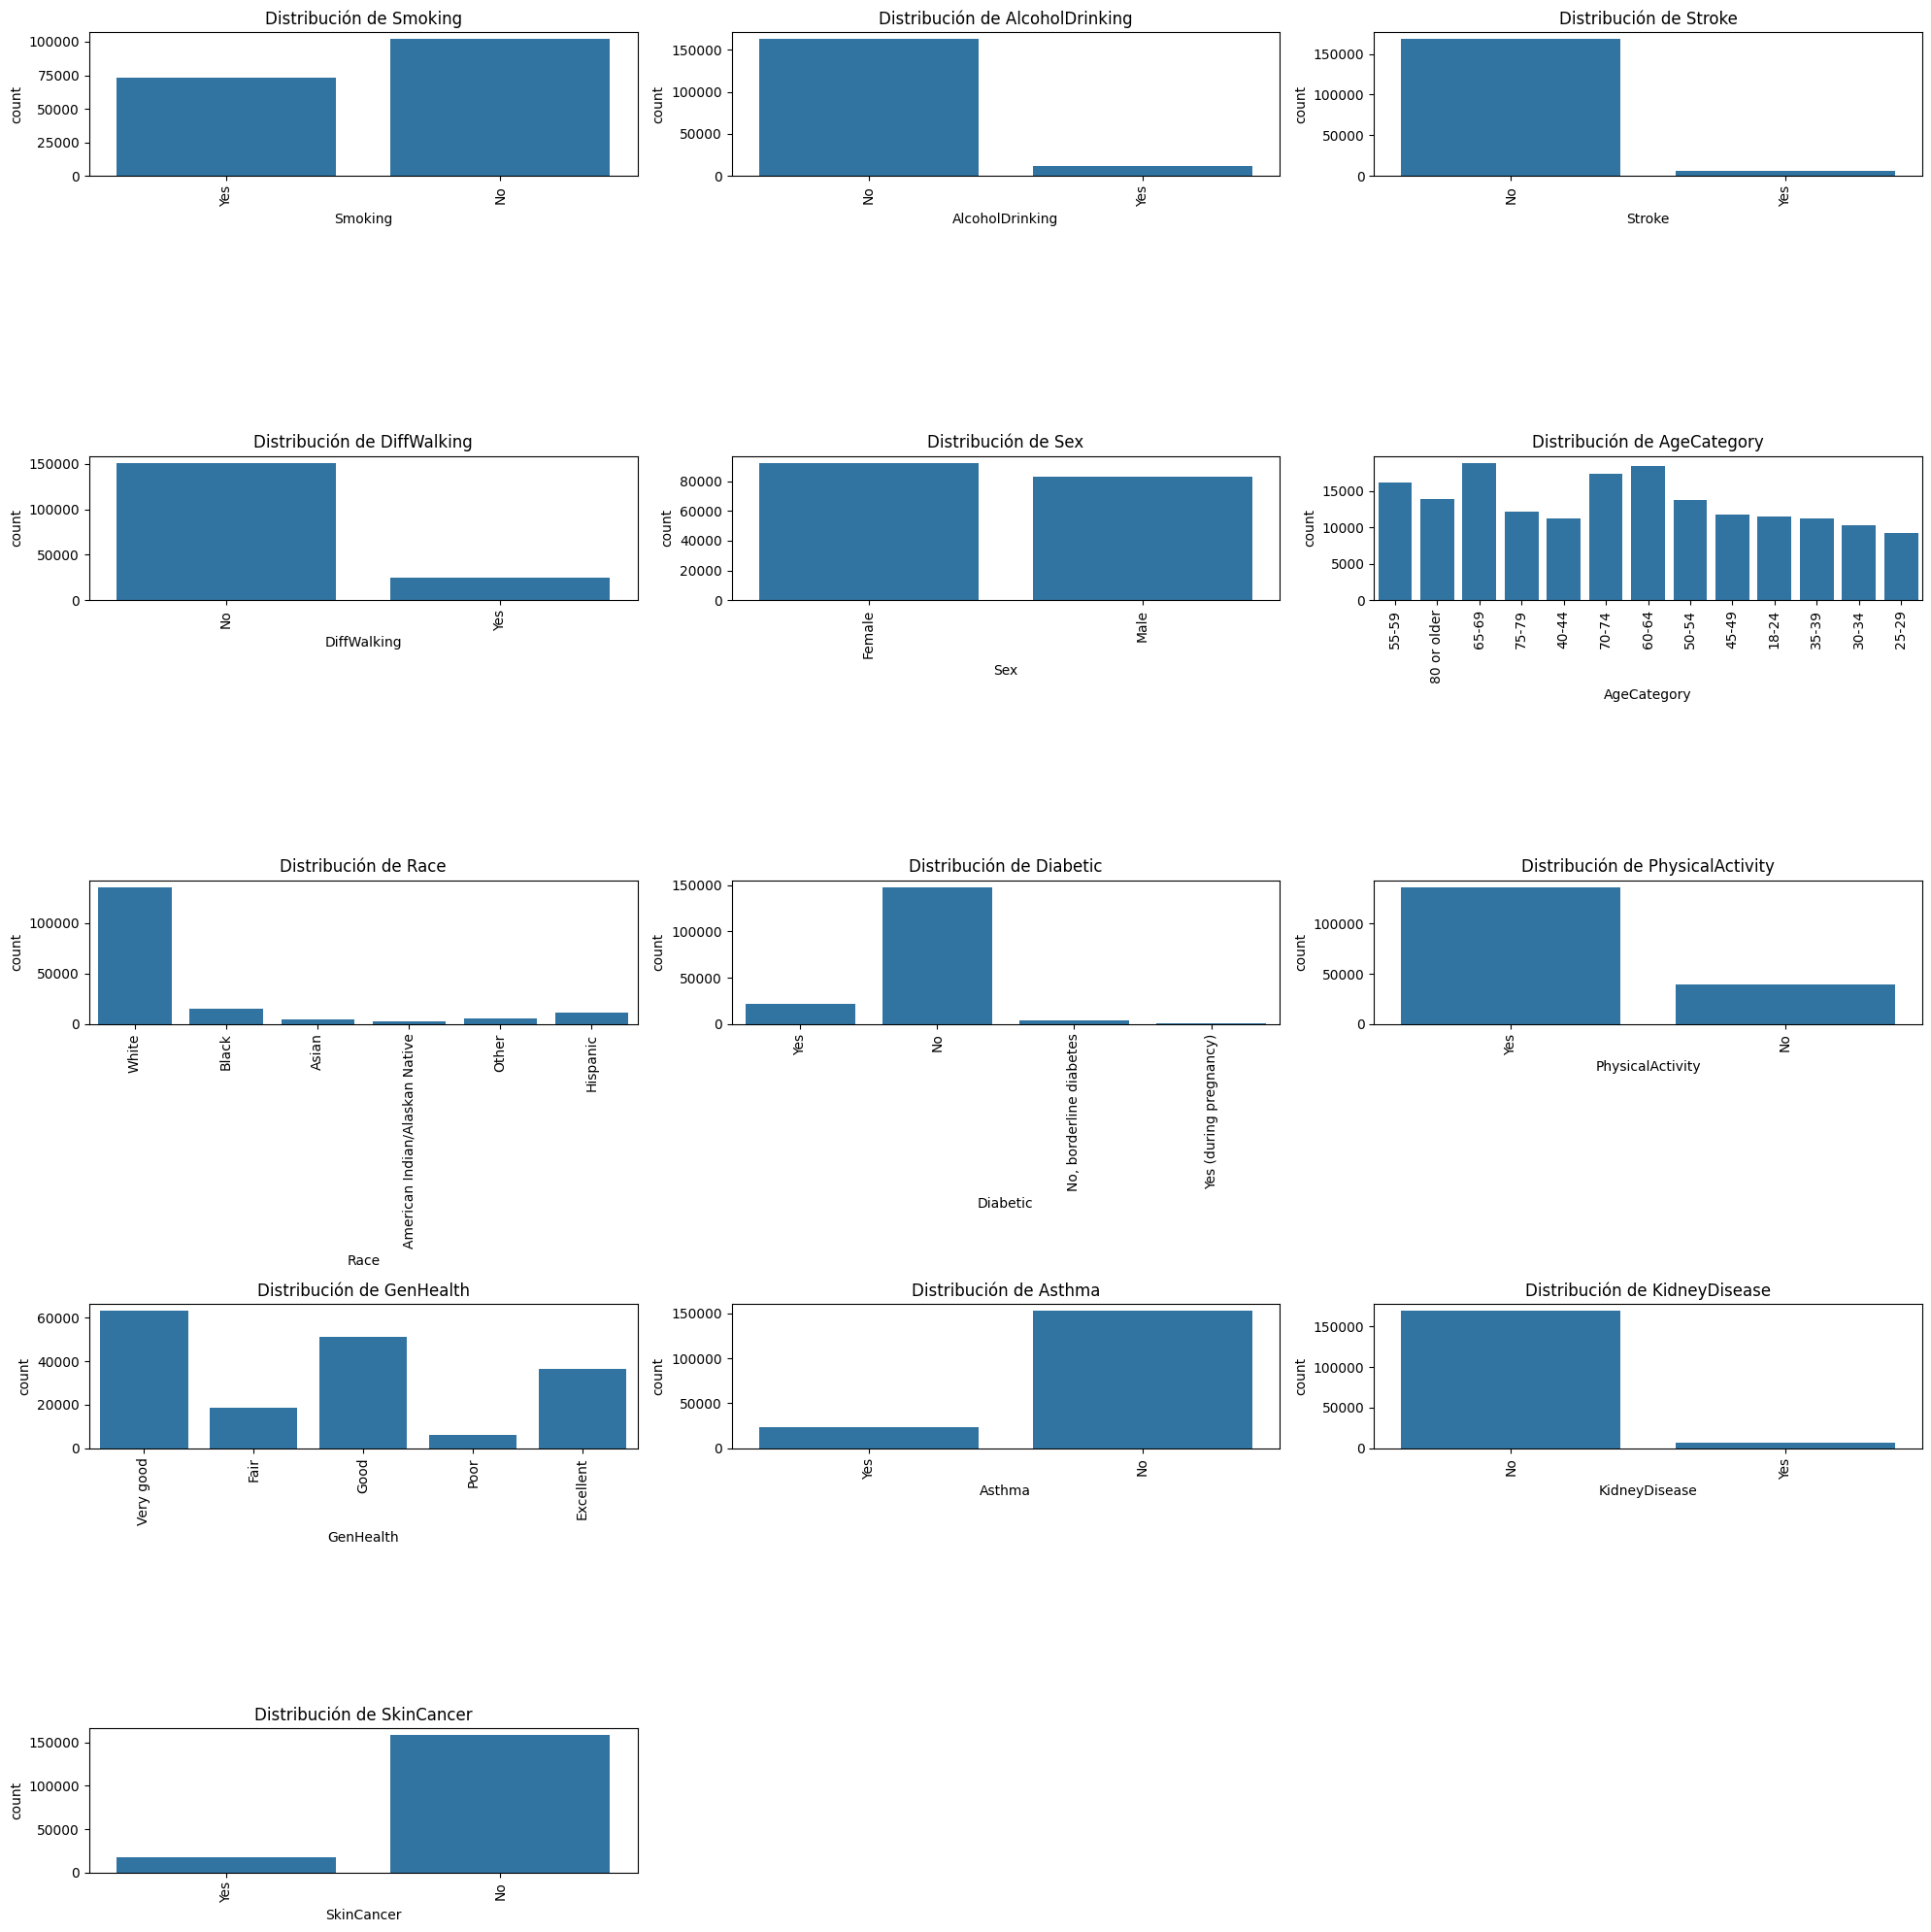

In [ ]:
# Distribución de variables categóricas

columnas_categoricas = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

plt.figure(figsize = (20, 20))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x = col, data = df)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

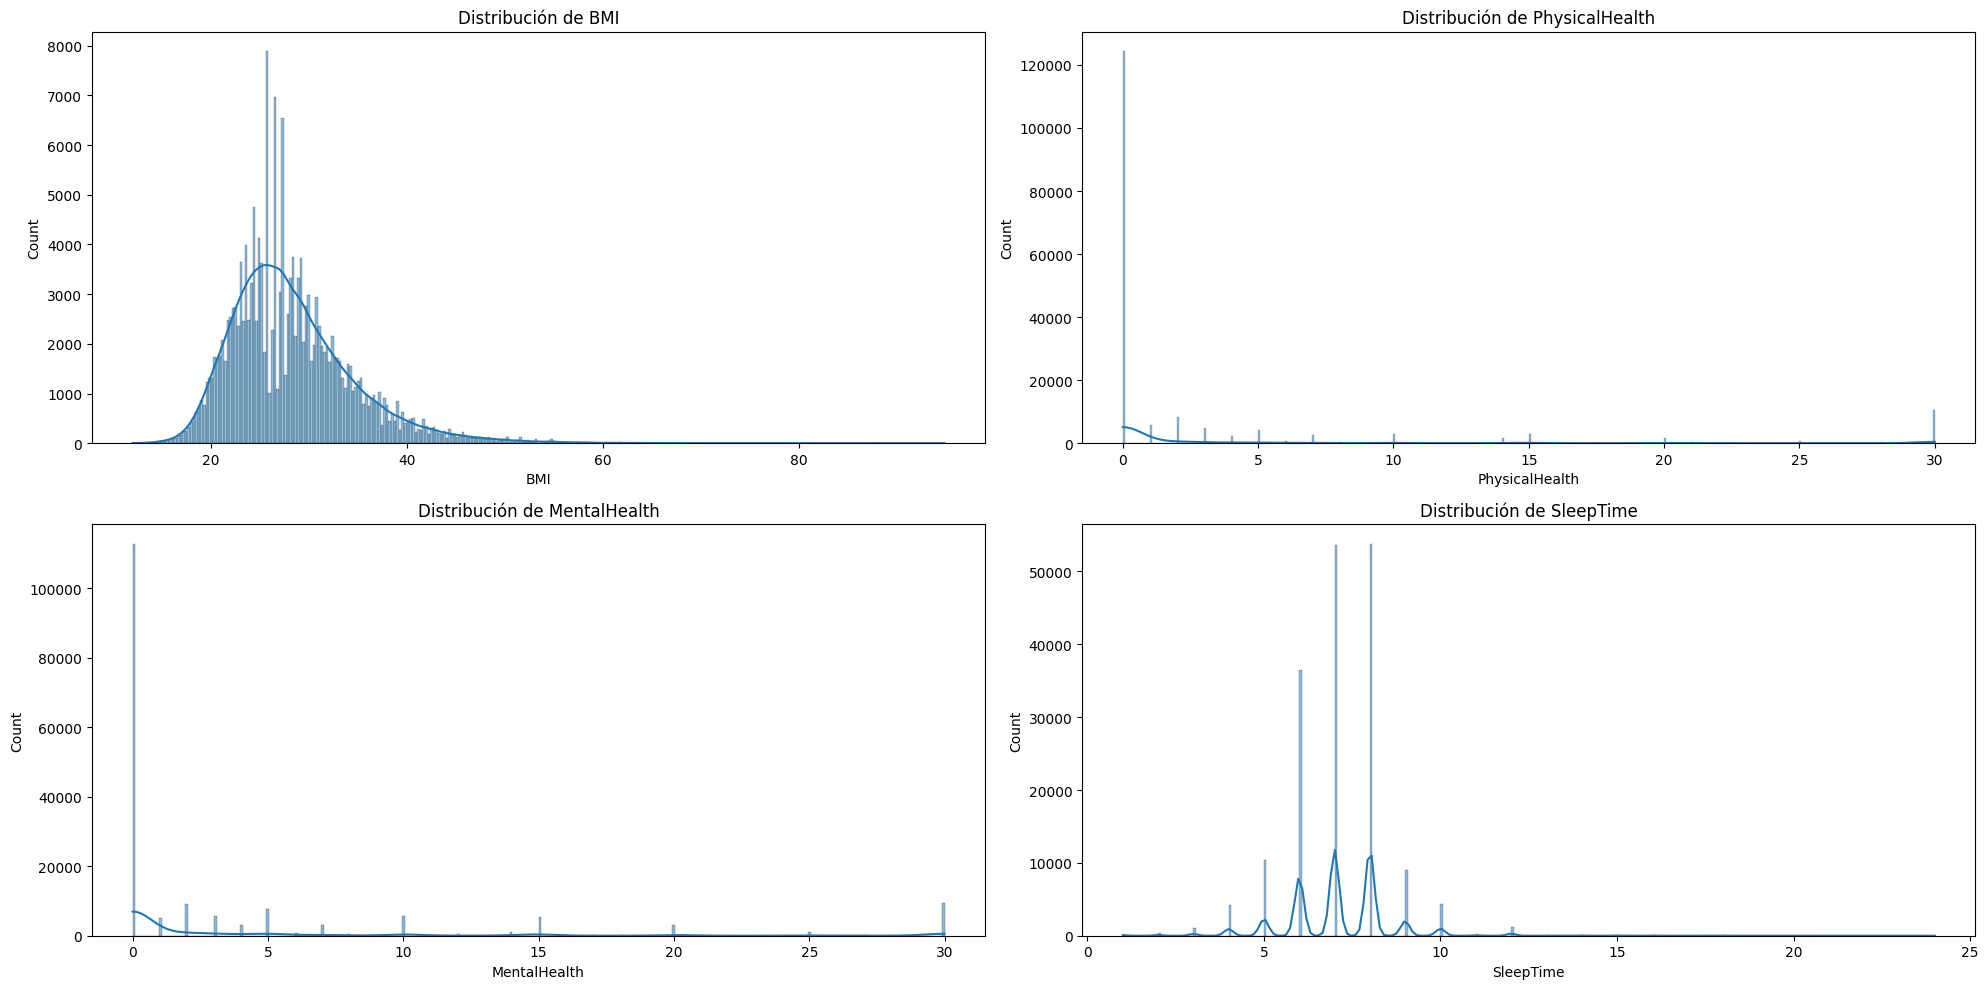

In [ ]:
# Distribución de las variables numéricas

columnas_numericas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize = (20, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde = True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

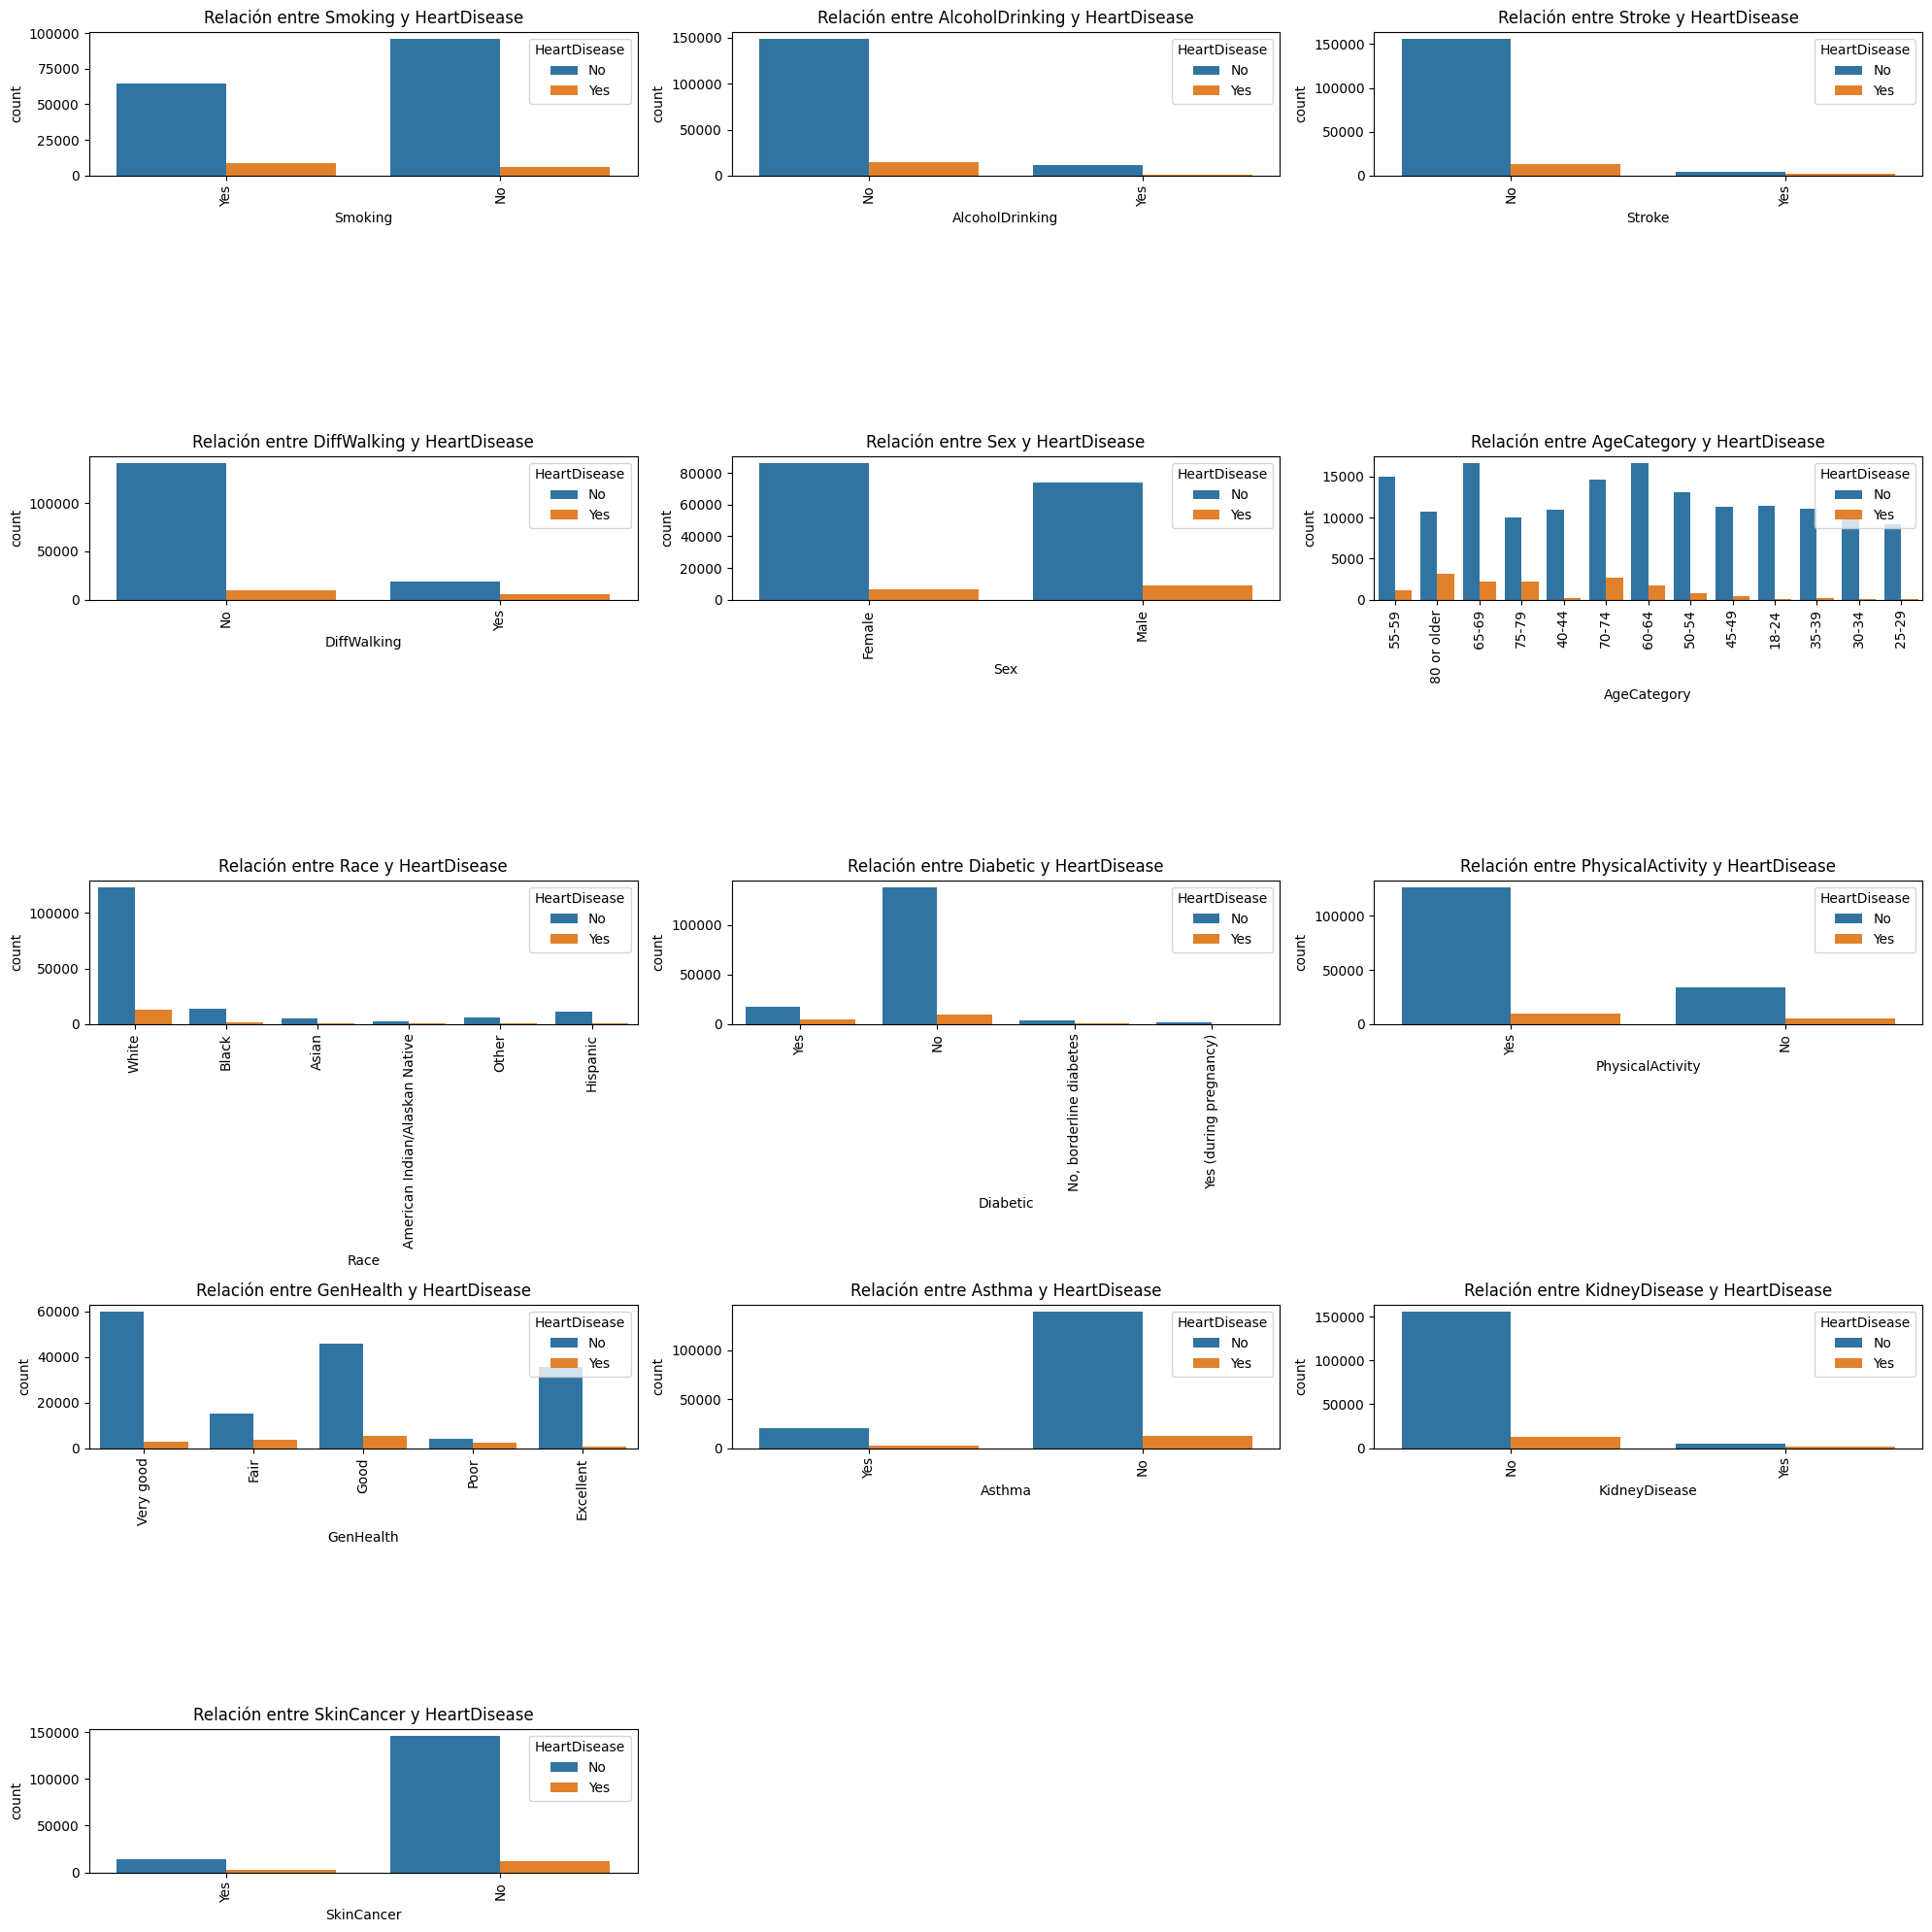

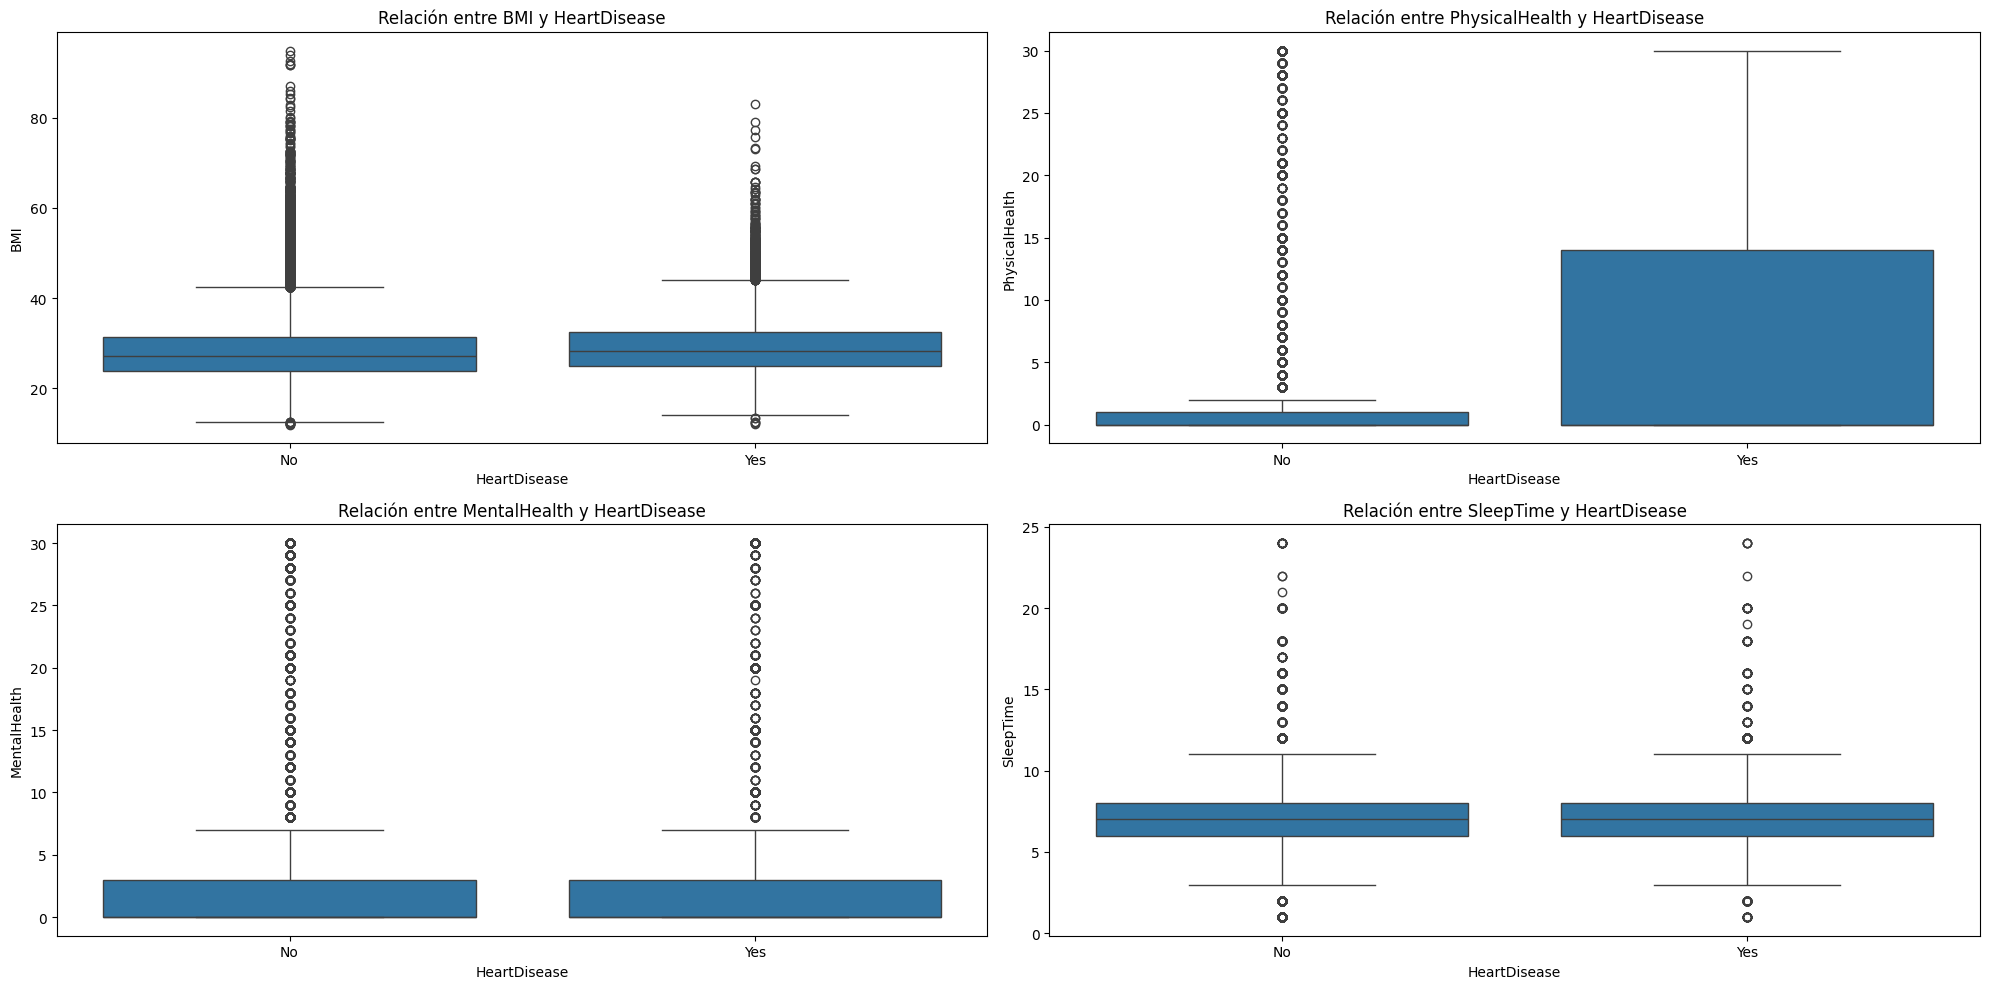

In [ ]:
# Relación entre variables

# Relación entre variables categóricas y HeartDisease
plt.figure(figsize = (20, 20))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x = col, hue = 'HeartDisease', data = df)
    plt.title(f'Relación entre {col} y HeartDisease')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# Relación entre variables numéricas y HeartDisease
plt.figure(figsize = (20, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x = 'HeartDisease', y = col, data = df)
    plt.title(f'Relación entre {col} y HeartDisease')
plt.tight_layout()
plt.show()

# 04. Modelos, Métricas y Métodos de Validación

En esta etapa vamos a implementar los modelos de Machine Learning que se adecuen mejor al problema y como consecuencia las métricas de cada modelo.

*  Primero vamos a entrenar diferentes modelos y calcular todas las métricas y dependiendo de la naturaleza del problema vamos a seleccionar el modelo que mejor desempeño tiene, utilizando los 3 métodos de validación.

*  Luego vamos a hacerle "Tuning" con GridSearchCV para encontrar los mejores parámetros para el modelo.

En caso de estar haciendo un Algoritmo Genético o un Recomendador el objetivo de esta parte deberá ser el de mejorar el modelo para que sea más eficiente.

In [ ]:
# 2024-07-01 AGM Subo la parte de ML :) <<-- todos los comentarios son eliminables luego ;)

# 2024-07-01 AGM Vemos cinco filas al azar.

df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
67679,No,22.27,Yes,Yes,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,8.0,Yes,No,No
57397,No,17.63,No,No,No,0.0,30.0,No,Male,18-24,Hispanic,No,Yes,Fair,8.0,No,No,No
18530,No,27.12,No,No,No,0.0,15.0,No,Male,45-49,White,No,Yes,Very good,8.0,No,No,No
117075,No,25.06,No,Yes,No,0.0,0.0,No,Female,65-69,White,No,Yes,Excellent,8.0,No,No,No
151724,No,30.85,No,No,No,10.0,0.0,No,Male,40-44,White,No,Yes,Good,7.0,Yes,No,No


In [ ]:
# 2024-07-01 AGM Esta parte es para dejar el dataframe listo para ML, luego movemos esta parte. Lo que quiero para entrenar los modelos es dejar el dataframe con las columnas Yes/No a 1/0, y hacer OneHotEncoding para las que tienen varios valores.

# 2024-07-01 AGM Lo primero, hacemos una copia del dataframe.

df_ml = df.copy()
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
27667,No,25.07,Yes,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Very good,8.0,No,No,No
12038,No,38.35,No,No,No,10.0,0.0,No,Male,45-49,Hispanic,Yes,Yes,Very good,6.0,No,No,No
14508,No,26.50,Yes,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,8.0,No,No,No
57081,No,24.28,Yes,Yes,No,2.0,0.0,No,Male,75-79,White,No,Yes,Very good,8.0,No,No,No
64382,No,23.17,No,No,No,0.0,0.0,No,Female,75-79,White,No,Yes,Very good,7.0,No,No,Yes


In [ ]:
# 2024-07-01 AGM Modificamos las columnas binarias a 0´s y 1´s y la columna Sexla tratamos por separado.

columns_yes_no = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in columns_yes_no:
    df_ml[column] = df_ml[column].map({'Yes':1, 'No':0})

df_ml['Sex'] = df_ml['Sex'].map({'Male':0, 'Female':1})

df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
152292,0,24.80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,75-79,Black,No,1.0,Good,8.0,0.0,0.0,0.0
146347,0,26.45,1.0,0.0,0.0,0.0,0.0,0.0,1.0,75-79,White,No,1.0,Very good,20.0,1.0,1.0,0.0
93238,0,23.78,1.0,0.0,0.0,15.0,7.0,0.0,1.0,45-49,Hispanic,Yes,0.0,Fair,6.0,0.0,0.0,0.0
8114,0,31.93,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80 or older,Hispanic,No,1.0,Good,8.0,0.0,0.0,0.0
76060,0,30.18,1.0,0.0,0.0,0.0,3.0,0.0,1.0,70-74,White,No,0.0,Good,6.0,0.0,0.0,1.0


In [ ]:
# 2024-07-01 AGM Modificamos ahora las columnas categóricas haciendo OneHotEncoding.

columns_to_encode = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

# 2024-07-01 AGM Inicializar el OneHotEncoder. Sparse_output = false genera una matriz que se puede convertir a dataframe.
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)

# 2024-07-01 AGM Crea tabla con todas las columnas que se han codificado.
encoded_data = one_hot_encoder.fit_transform(df_ml[columns_to_encode])

# 2024-07-01 AGM Convertimos dataframe del encoded_data y asignamos nombres a las columnas.
df_encoded_data = pd.DataFrame(encoded_data, columns = one_hot_encoder.get_feature_names_out(columns_to_encode))
df_encoded_data

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,...,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),Diabetic_nan,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,GenHealth_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
175530,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
175531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
175532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 2024-07-01 AGM Eliminamos las columnas codificadas.

df_ml.drop(columns = columns_to_encode, inplace = True)
df_ml.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [ ]:
# 2024-07-01 AGM Vamos a unir ambos dataframes. Importante: Al usar concat hay que especificar si queremos que concatene los dataframes verticalmente u horizontalmente. Para concatenar horizontalmente hay que usar axis = 1, para verticalmente, axis = 0. Lo descubrí tras varios fallos y ChatGPT me ayudó :P

df_ml = pd.concat([df_ml, df_encoded_data], axis = 1)
df_ml.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older', 'AgeCategory_nan',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Race_nan', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'Diabetic_nan',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good', 'GenHealth_nan'],
      dtype='object')

In [ ]:
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),Diabetic_nan,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,GenHealth_nan
123280,0,30.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152973,1,57.61,0.0,0.0,0.0,30.0,30.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
167117,0,21.46,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95061,0,22.38,0.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
70947,0,19.13,1.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_ml['GenHealth_nan'].unique()

array([0., 1.])

In [ ]:
df_ml.isna().sum()

HeartDisease                           0
BMI                                    0
Smoking                                1
AlcoholDrinking                        1
Stroke                                 1
PhysicalHealth                         1
MentalHealth                           1
DiffWalking                            1
Sex                                    1
PhysicalActivity                       1
SleepTime                              1
Asthma                                 1
KidneyDisease                          1
SkinCancer                             1
AgeCategory_18-24                      0
AgeCategory_25-29                      0
AgeCategory_30-34                      0
AgeCategory_35-39                      0
AgeCategory_40-44                      0
AgeCategory_45-49                      0
AgeCategory_50-54                      0
AgeCategory_55-59                      0
AgeCategory_60-64                      0
AgeCategory_65-69                      0
AgeCategory_70-7

In [ ]:
# 2024-07-01 AGM De alguna manera se nos ha colado algún nulo. Me los cargo para poder hacer rápido esto, pero habrá que echar un vistazo.

df_ml.dropna(inplace = True)

In [ ]:
# 2024-07-01 AGM Convertimos de Float a int todas las columnas excepto BMI.

for column in df_ml.columns:
    if column != 'BMI':
        df_ml[column] = df_ml[column].astype(int)

df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),Diabetic_nan,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,GenHealth_nan
95442,0,35.94,1,0,0,7,5,1,0,1,...,0,0,0,0,0,1,0,0,0,0
112105,0,42.29,0,0,0,0,15,0,1,0,...,0,0,0,0,0,0,0,0,1,0
134326,0,30.90,0,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
132291,0,23.71,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
67275,0,30.17,1,0,0,15,15,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# 2024-07-01 AGM Variable a predecir (Target): HeartDisease

df_ml_copy = df_ml.copy()

X = df_ml_copy.drop('HeartDisease', axis = 1)
y = df_ml_copy['HeartDisease']

In [ ]:
# 2024-07-01 AGM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# 2024-07-01 AGM Usamos de normalizador el MinMaxScaler. Se puede probar con varios.

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 2024-07-01 AGM Modelos candidatos: añadir mas opciones luego.

candidate_models = {'Regresión logística': LogisticRegression(max_iter = 1000),
                    'Árbol de decisión': DecisionTreeClassifier(),
                    'Random forest': RandomForestClassifier(),
                    'Gradient boosting': GradientBoostingClassifier(),
                    'Adaboost': AdaBoostClassifier(),
                    'KNN': KNeighborsClassifier(),
                    'Gaussian NB': GaussianNB(),
                    'LDA': LinearDiscriminantAnalysis(),
                    'QDA': QuadraticDiscriminantAnalysis()}

# Quito 'SVM': SVC() del diccionario porque tarda mucho (222 minutos).
for name, model in candidate_models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(f'{name}: \naccuracy: {accuracy}')
    print(confusion_matrix(y_test, y_predict))

Regresión logística: 
accuracy: 0.9138918164468625
Árbol de decisión: 
accuracy: 0.8643575355342239
Random forest: 
accuracy: 0.9045774346996326
Gradient boosting: 
accuracy: 0.9143475660124761
Adaboost: 
accuracy: 0.9137209103597573
KNN: 
accuracy: 0.9058307460050702
Gaussian NB: 
accuracy: 0.71148204061868
LDA: 
accuracy: 0.905289543395904
QDA: 
accuracy: 0.6515509727404791


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

In [ ]:
parametros = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = parametros, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros para Random Forest:", grid_search.best_params_)

mejor_modelo = grid_search.best_estimator_
y_pred_mejor = mejor_modelo.predict(X_test)

print("Resultados Random Forest optimizado con GridSearchCV:")
print(classification_report(y_test, y_pred_mejor))
print(confusion_matrix(y_test, y_pred_mejor))

# 05. Resultados y Conclusiones

Para terminar, vamos a probar el modelo con datos completamente nuevos y vamos explicar el desempeño del modelo y que alternativas podemos tomar para mejorar el desempeño del modelo.

# 06. Storytelling

Como último vamos a hacer una pequeña presentación de principio a fin sobre el proyecto, esta presentación puede incluir:

*  Motivaciones del proyecto.

*  Alcance del proyecto.

*  Herramientas o tecnologías usadas.

*  Desafíos en cada parte del proceso.

*  Resolución de cada desafío o problema.

*  Un esquema de lo que fue el proyecto.

*  Visualizaciones y resultados.

Todos los miembros del equipo deben participar, no es obligatorio hacer una presentación o material audiovisual. Esta parte no será evaluada.